# Project Health And Lifestyle Analysis

### The main goal is to explore the relationships between different indicators and assess the overall health of respondents.
| Feature | Description |
| ---------------------------------------------------------- | ---------------------------------------------- |
| Age, Gender | Demographic variables |
| Sleep_Hours, Exercise_Freq, Stress_Level | Lifestyle indicators |
| BMI, Chronic_Disease | Medical variables |
| Smoker, Alcohol_Consumption, Diet_Quality | Bad habits and nutrition |
| Healthy | Created feature: conditionally healthy (1) or not (0) |

## Importing Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Info

In [7]:
df=pd.read_csv("../data/synthetic_health_lifestyle_dataset.csv")

In [8]:
df.shape

(7500, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7500 non-null   int64  
 1   Age                  7500 non-null   int64  
 2   Gender               7500 non-null   object 
 3   Height_cm            7500 non-null   float64
 4   Weight_kg            7500 non-null   float64
 5   BMI                  7500 non-null   float64
 6   Smoker               7500 non-null   object 
 7   Exercise_Freq        5621 non-null   object 
 8   Diet_Quality         7500 non-null   object 
 9   Alcohol_Consumption  5608 non-null   object 
 10  Chronic_Disease      7500 non-null   object 
 11  Stress_Level         7500 non-null   int64  
 12  Sleep_Hours          7500 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 761.8+ KB


In [10]:
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours
0,1,56,Other,177.6,37.3,11.8,Yes,NaN,Poor,NaN,No,9,8.5
1,2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,No,2,5.9
2,3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,No,3,4.8
3,4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6
4,5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Height_cm                 0
Weight_kg                 0
BMI                       0
Smoker                    0
Exercise_Freq          1879
Diet_Quality              0
Alcohol_Consumption    1892
Chronic_Disease           0
Stress_Level              0
Sleep_Hours               0
dtype: int64

In [13]:
(df.isnull().mean() * 100).sort_values(ascending=False)

Alcohol_Consumption    25.226667
Exercise_Freq          25.053333
Gender                  0.000000
Age                     0.000000
ID                      0.000000
Weight_kg               0.000000
Height_cm               0.000000
Smoker                  0.000000
BMI                     0.000000
Diet_Quality            0.000000
Chronic_Disease         0.000000
Stress_Level            0.000000
Sleep_Hours             0.000000
dtype: float64

## Data Cleaning

### There are missing values ​​in two columns, which is important for analysis. We need to fill in the blanks.

In [14]:
bins=[0,25,35,50,100]
labels=['18-25','26-35','36-50','51+']

In [15]:
df['Age_Group'] = pd.cut(df['Age'],bins=bins, labels=labels)

In [16]:
df['Exercise_Freq'] = df.groupby(
    ['Age_Group','Gender','Smoker'],observed=False)['Exercise_Freq']\
    .transform(lambda x:x.fillna(x.mode()[0])if not x.mode().empty else x)

In [17]:
df['Alcohol_Consumption'] = df.groupby(
    ['Age_Group','Gender','Smoker'],observed=False)['Alcohol_Consumption']\
    .transform(lambda x:x.fillna(x.mode()[0])if not x.mode().empty else x)

In [18]:
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,Chronic_Disease,Stress_Level,Sleep_Hours,Age_Group
0,1,56,Other,177.6,37.3,11.8,Yes,1-2 times/week,Poor,High,No,9,8.5,51+
1,2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,No,2,5.9,51+
2,3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,No,3,4.8,36-50
3,4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,No,9,6.6,26-35
4,5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,Yes,6,6.1,51+


In [19]:
df.duplicated().sum()
df.isnull().sum()

ID                     0
Age                    0
Gender                 0
Height_cm              0
Weight_kg              0
BMI                    0
Smoker                 0
Exercise_Freq          0
Diet_Quality           0
Alcohol_Consumption    0
Chronic_Disease        0
Stress_Level           0
Sleep_Hours            0
Age_Group              0
dtype: int64

In [20]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI', 'Smoker',
       'Exercise_Freq', 'Diet_Quality', 'Alcohol_Consumption',
       'Chronic_Disease', 'Stress_Level', 'Sleep_Hours', 'Age_Group'],
      dtype='object')

## Exploratory Data Analysis and Visualization

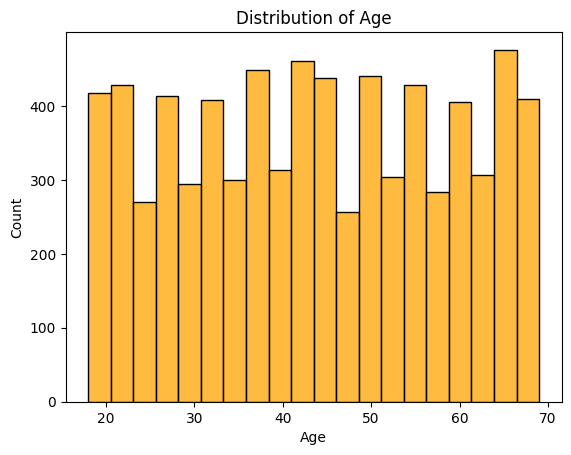

In [21]:
sns.histplot(df['Age'],color="orange")
plt.title('Distribution of Age')
plt.savefig('../images/age_distribution.png')
plt.show()

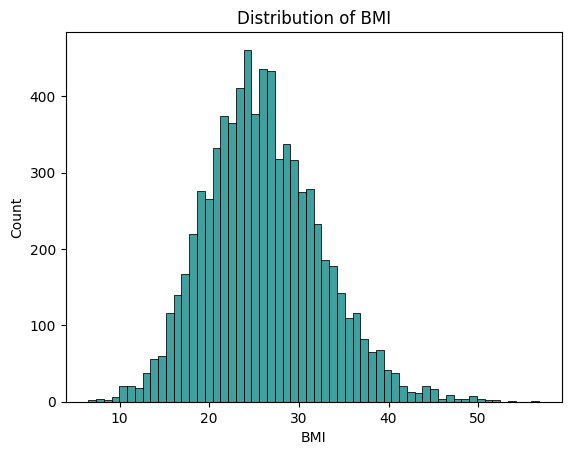

In [22]:
sns.histplot(df['BMI'],color="teal")
plt.title('Distribution of BMI')
plt.savefig('../images/bmi_distribution.png')
plt.show()

* Body mass index fluctuates within healthy ranges, but there is a notable proportion of people who are overweight.

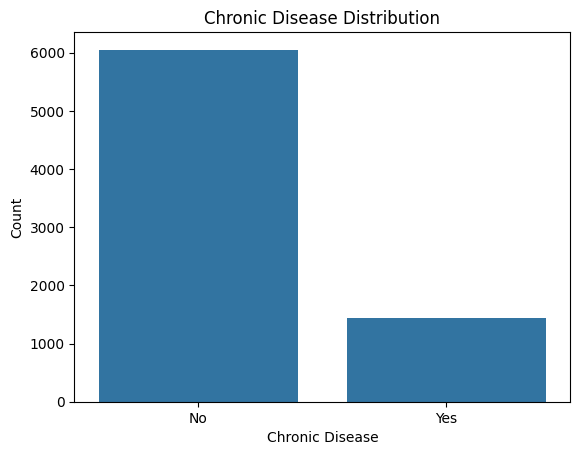

In [23]:
sns.countplot(data=df, x="Chronic_Disease")
plt.title("Chronic Disease Distribution")
plt.xlabel("Chronic Disease")
plt.ylabel("Count")
plt.savefig('../images/disease_distribution.png')
plt.show()

### Stress based on Smoker and Non-smoker

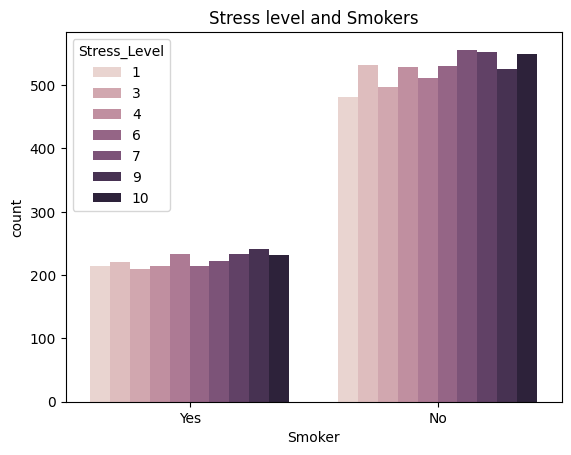

In [24]:
sns.countplot(x='Smoker', hue='Stress_Level', data=df)
plt.title('Stress level and Smokers')
plt.savefig('../images/stress_level_and_smokers.png')
plt.show()

- Smoking is not necessarily associated with higher stress levels, at least according to this graph.

In [25]:
dist_smoker_stress=df.groupby(["Smoker","Stress_Level"]).size().reset_index(name="Count")
dist_smoker_stress.style.background_gradient(cmap="Reds")

,Smoker,Stress_Level,Count
0,No,1,481
1,No,2,532
2,No,3,497
3,No,4,528
4,No,5,511
5,No,6,531
6,No,7,556
7,No,8,552
8,No,9,525
9,No,10,550


### Stress based on Diet Quality

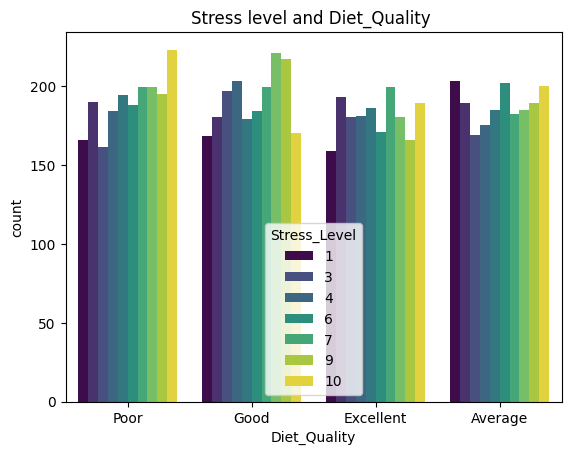

In [26]:
sns.countplot(x='Diet_Quality', hue='Stress_Level', data=df, palette="viridis")
plt.title('Stress level and Diet_Quality ')
plt.savefig('../images/stress_and_diet.png')
plt.show()

* People with poor diets are significantly more likely to have high levels of stress. Good nutrition is associated with less stress.

### Stress Level vs Sleep Hours

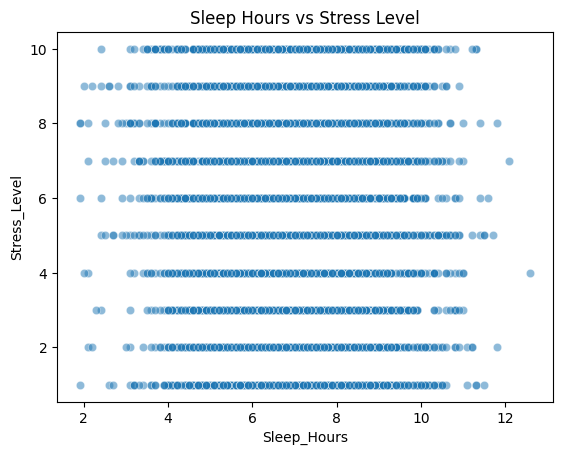

In [27]:
sns.scatterplot(x='Sleep_Hours', y='Stress_Level', data=df, alpha=0.5)
plt.title('Sleep Hours vs Stress Level')
plt.savefig('../images/sleep_h_stress_level.png')
plt.show()

## Alcohol Consumption by Smoking Status

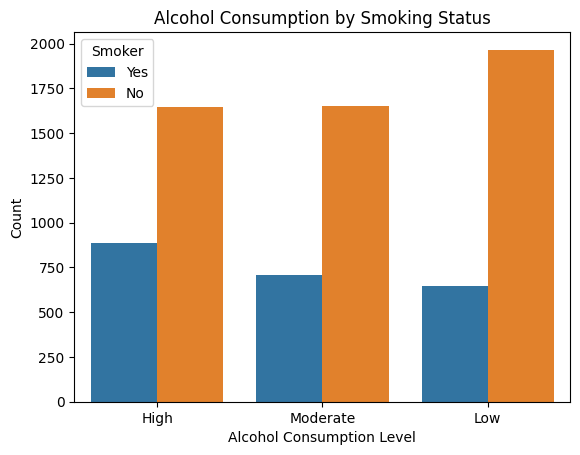

In [28]:
sns.countplot(x='Alcohol_Consumption', hue='Smoker', data=df)
plt.title("Alcohol Consumption by Smoking Status")
plt.xlabel("Alcohol Consumption Level")
plt.ylabel("Count")
plt.savefig('../images/alcohol_smoking.png')
plt.show()

* Smokers are significantly more likely to drink more alcohol, which can create a combination of risky habits

### BMI by Chronic Disease 

In [29]:
df["Chronic_Disease"].value_counts()

Chronic_Disease
No     6052
Yes    1448
Name: count, dtype: int64

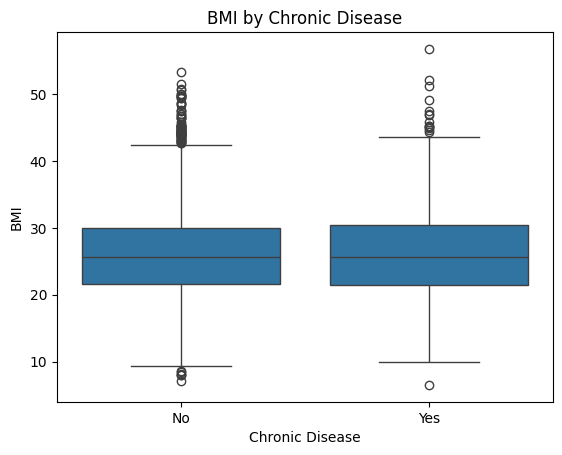

In [30]:
sns.boxplot(data=df, x="Chronic_Disease", y="BMI")
plt.title("BMI by Chronic Disease")
plt.xlabel("Chronic Disease")
plt.ylabel("BMI")
plt.savefig('../images/bmi_chronic_disease.png')
plt.show()

### Correlation Heatmap

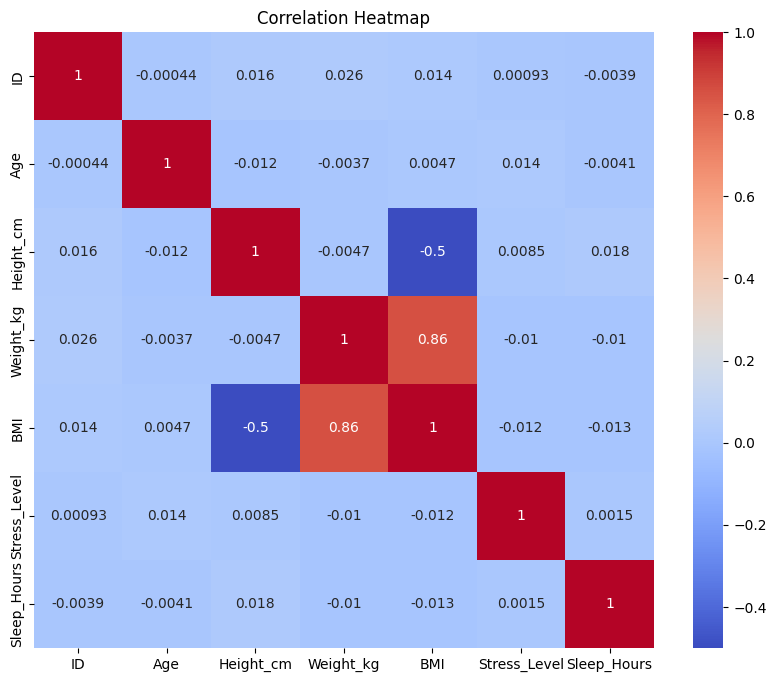

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('../images/correlation_heatmap.png')
plt.show()

## Creating a Healthy feature 

In [32]:
df['No_Disease'] = (df['Chronic_Disease'] == 'No').astype(int)
df['Low_Stress'] = (df['Stress_Level'] <= 4).astype(int)
df['Enough_Sleep'] = (df['Sleep_Hours'] >= 7).astype(int)
df['Active'] = df['Exercise_Freq'].isin(['Daily', 'Several times a week']).astype(int)
df['Good_Diet'] = df['Diet_Quality'].isin(['Good', 'Very Good', 'Excellent']).astype(int)
df['No_Smoke_Alcohol'] = (
    (df['Smoker'] == 'No') & (df['Alcohol_Consumption'].isin(['None', 'Low']))
).astype(int)

In [33]:
df['Health_Score'] = (
    df['No_Disease'] + df['Low_Stress'] + df['Enough_Sleep'] +
    df['Active'] + df['Good_Diet'] + df['No_Smoke_Alcohol']
)

In [34]:
df['Healthy'] = (df['Health_Score'] >= 4).astype(int)

In [35]:
df['Healthy'].value_counts()

Healthy
0    5457
1    2043
Name: count, dtype: int64

In [36]:
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Smoker,Exercise_Freq,Diet_Quality,Alcohol_Consumption,...,Sleep_Hours,Age_Group,No_Disease,Low_Stress,Enough_Sleep,Active,Good_Diet,No_Smoke_Alcohol,Health_Score,Healthy
0,1,56,Other,177.6,37.3,11.8,Yes,1-2 times/week,Poor,High,...,8.5,51+,1,0,1,0,0,0,2,0
1,2,69,Other,169.3,70.7,24.7,No,1-2 times/week,Good,High,...,5.9,51+,1,1,0,0,1,0,3,0
2,3,46,Female,159.1,69.0,27.3,No,Daily,Excellent,Moderate,...,4.8,36-50,1,1,0,1,1,0,4,1
3,4,32,Male,170.6,76.4,26.3,No,3-5 times/week,Excellent,Moderate,...,6.6,26-35,1,0,0,0,1,0,2,0
4,5,60,Male,158.4,60.4,24.1,No,3-5 times/week,Excellent,Low,...,6.1,51+,0,0,0,0,1,1,2,0


## Visualization

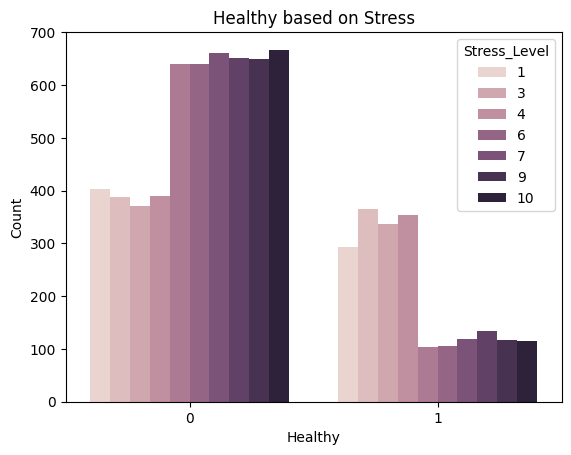

In [37]:
sns.countplot(x='Healthy', hue='Stress_Level', data=df)
plt.title("Healthy based on Stress")
plt.xlabel("Healthy")
plt.ylabel("Count")
plt.savefig('../images/helthy_stress.png')
plt.show()

* Unhealthy respondents have higher levels of stress, confirming its impact on overall well-being

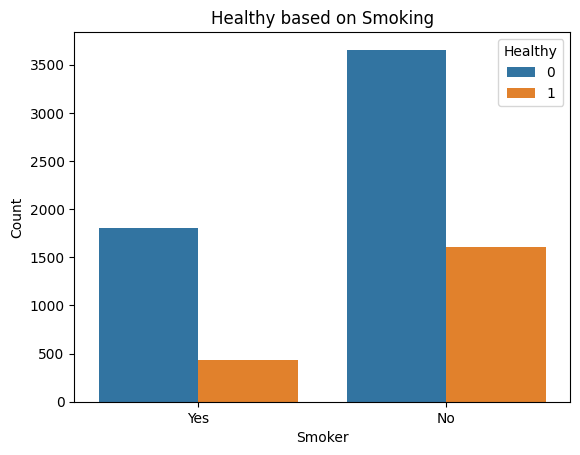

In [38]:
sns.countplot(x='Smoker', hue='Healthy', data=df)
plt.title("Healthy based on Smoking")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.savefig('../images/healthy_and_smoking.png')
plt.show()

* Smokers are less likely to be healthy than non-smokers

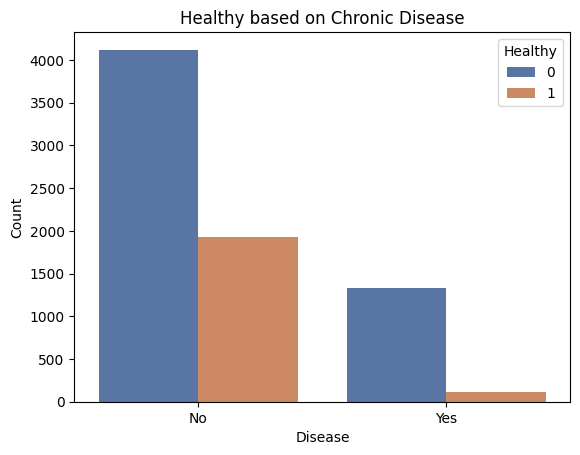

In [39]:
sns.countplot(x='Chronic_Disease', hue='Healthy', data=df, palette='deep')
plt.title("Healthy based on Chronic Disease")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.savefig('../images/healthy_and_chronic_disease.png')
plt.show()

* Chronic diseases significantly reduce the likelihood of being healthy, which is entirely expected.

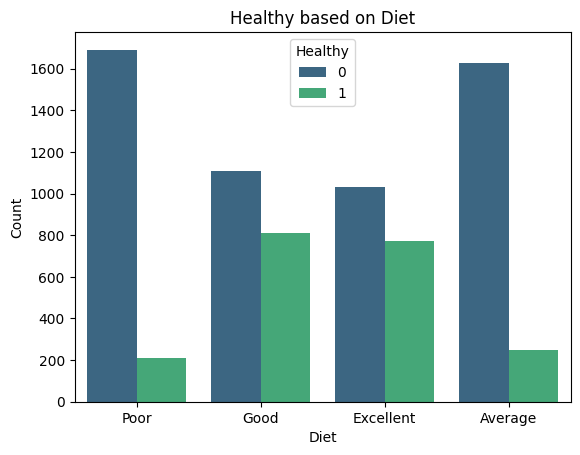

In [40]:
sns.countplot(x='Diet_Quality', hue='Healthy', data=df, palette='viridis')
plt.title("Healthy based on Diet")
plt.xlabel("Diet")
plt.ylabel("Count")
plt.savefig('../images/healthy_and_diet.png')
plt.show()

* People who have a poor diet are more likely to be unhealthy

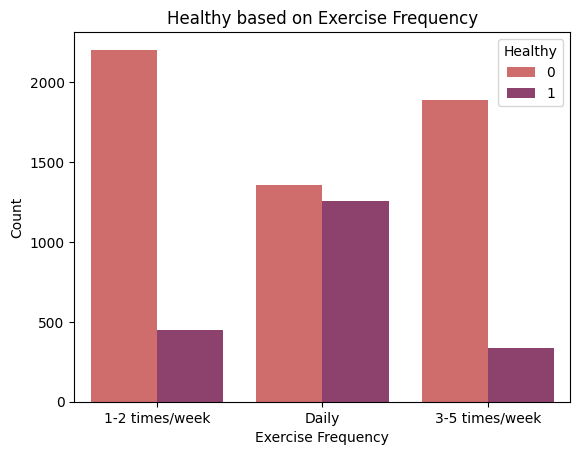

In [41]:
sns.countplot(x='Exercise_Freq', hue='Healthy', data=df, palette='flare')
plt.title("Healthy based on Exercise Frequency")
plt.xlabel("Exercise Frequency")
plt.ylabel("Count")
plt.savefig('../images/healthy_and_exercises.png')
plt.show()

* As a result, the graph shows that those who exercise daily will be the healthiest.

In [46]:
plot_df = df['Healthy'].value_counts(normalize=True).reset_index()
plot_df.columns = ['Healthy', 'Percentage']
plot_df['Percentage'] *= 100

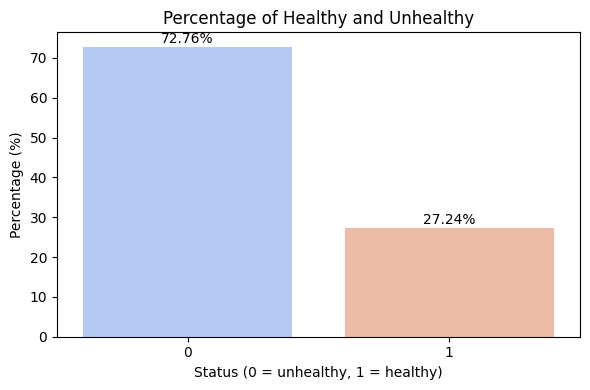

In [48]:
plt.figure(figsize=(6,4))
sns.barplot(data=plot_df, x='Healthy', y='Percentage', hue='Healthy', palette='coolwarm', dodge=False, legend=False)

plt.title('Percentage of Healthy and Unhealthy')
plt.ylabel('Percentage (%)')
plt.xlabel('Status (0 = unhealthy, 1 = healthy)')

# додати підписи над стовпцями
for i, val in enumerate(plot_df['Percentage']):
    plt.text(i, val + 1, f'{val:.2f}%', ha='center')

plt.tight_layout()
plt.savefig('../images/healthy_percentage.png')
plt.show()


## Conclusion

* A conditional feature Healthy has been created, which determines whether a person has a sufficient number of healthy habits**.
* Those who meet at least 4 of the 6 features are considered healthy:

* Absence of chronic diseases
* Low stress level (≤ 4)
* Sufficient sleep (≥ 7 hours)
* Regular physical activity
* Balanced diet
* Refusal to smoke and drink excessively

According to this criterion, approximately 27% of people in the sample are considered healthy